# Introduction to SKFuzzy

In [2]:
#!pip install -U scikit-fuzzy

#conda install -c conda-forge scikit-fuzzy 
#conda install -c conda-forge/label/gcc7 scikit-fuzzy 
#conda install -c conda-forge/label/cf201901 scikit-fuzzy

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Let's build a fuzzy membership function

NameError: name 'universe' is not defined

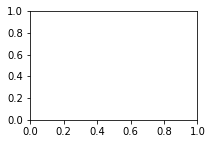

In [4]:
#https://pythonhosted.org/scikit-fuzzy/_modules/skfuzzy/membership/generatemf.html

# let's build a membership function:





# Visualize 
fig, (ax0) = plt.subplots(nrows=1, figsize=(3, 2))

ax0.plot(universe, mf, 'b', linewidth=1.5, label='Low')
ax0.set_title('MF')
ax0.legend()

plt.tight_layout()

# The Tipping Problem

## Defining the problem

In [5]:
# Generate universe variables
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
# Let's generate membership function for the food quality

#qual_lo = 
#qual_md = 
#qual_hi = 


serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

## Visualizing the MFs

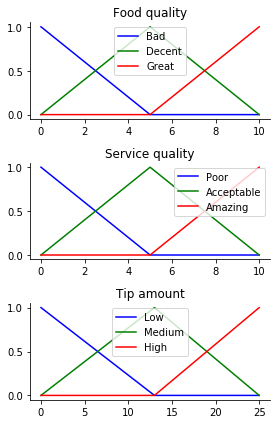

In [6]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(4, 6))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [7]:
# We need the activation of our fuzzy membership functions at these values.
# This is what fuzz.interp_membership exists for!


qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

print(qual_level_lo, qual_level_md, qual_level_hi)
print(serv_level_lo, serv_level_md, serv_level_hi)


#Rules
rule1 = np.fmax(qual_level_lo, serv_level_lo)
rule2 = serv_level_md
rule3 = np.fmax(qual_level_hi, serv_level_hi)


tip_activation_lo = np.fmin(rule1, tip_lo)
tip_activation_md = np.fmin(rule2, tip_md)
tip_activation_hi = np.fmin(rule3, tip_hi)



0.0 0.7 0.30000000000000004
0.0 0.03999999999999987 0.9600000000000002


## Rule aggregation

In [11]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))


tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
print(tip)

19.86871794871795


# Reference

1) https://pythonhosted.org/scikit-fuzzy/_modules/skfuzzy/membership/generatemf.html

2) https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html